<a href="https://colab.research.google.com/github/Jersae/Google-TimeSeries-workshop/blob/main/DLDev_04_TF2_Tabular_Data_Titanic_feature_cols_keras_and_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic prediction - with Feature Columns

https://www.tensorflow.org/guide/feature_columns

## Classify structured data using feature columns

### KEY PARTS
1. Load data in Pandas
2. Create Columns
3. Assemble model



## Imports

Import TensorFlow, feature columns, and supporting libraries.

In [ ]:

from matplotlib import pyplot as plt
import matplotlib

import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow import feature_column as fc


In [ ]:
tf.__version__

'2.4.1'

## Download the dataset


In [ ]:
!wget -qq https://www.dropbox.com/s/8299rs4rhkog018/titanic.zip
  
!unzip -qq titanic.zip
!rm -r titanic.zip
!rm -r __MACOSX

!ls

sample_data  titanic


In [ ]:
!ls titanic

gender_submission.csv  test.csv  train.csv


## Use Pandas to load and preprocess the data

[Pandas](https://pandas.pydata.org/) 

### Titanic dataset 




- Survived 0 - died , 1 - survived

- PassengerId: and id given to each traveler on the boat.
- Pclass: the passenger class. It has three possible values: 1,2,3.
- The Name
- The Sex
- The Age
- SibSp: number of siblings and spouses traveling with the passenger 
- Parch: number of parents and children traveling with the passenger
- The ticket number
- The ticket Fare
- The cabin number 
- The embarkation. It has three possible values S,C,Q 


1. Feature type:
  * Continuous features can be represented by `numeric_column`.
  * Categorical features can be represented by any `categorical_column_with_*`
  column:
    - `categorical_column_with_vocabulary_list`
    - `categorical_column_with_vocabulary_file`
    - `categorical_column_with_hash_bucket`
    - `categorical_column_with_identity`
    - `weighted_categorical_column`

In [ ]:
df = pd.read_csv('./titanic/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
type(df['Survived'][0])

numpy.int64

In [ ]:
# Convert the labels to float32 
df['Survived'] = df['Survived'].astype('float32')

In [ ]:
type(df['Survived'][0])

numpy.float32

## Fill in some missing data

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486594,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
type(df['Embarked'])
df['Embarked'] = df['Embarked'].fillna('unknown')
df['Cabin'] = df['Cabin'].fillna('unknown')

print(df['Embarked'].unique())
print(df['Cabin'].unique())

['S' 'C' 'Q' 'unknown']
['unknown' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78'
 'D33' 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26'
 'C110' 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7'
 'C49' 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87'
 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26'
 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124'
 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44'
 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20'
 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101'
 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48'
 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24'
 'C90' 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3'
 'D6' 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24'
 'C50' 'B42' 'C148']


## Drop Columns that I'm not using

In [ ]:
df = df.drop(['Ticket','Parch','PassengerId','Name'], axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
0,0.0,3,male,22.0,1,7.2500,unknown,S
1,1.0,1,female,38.0,1,71.2833,C85,C
2,1.0,3,female,26.0,0,7.9250,unknown,S
3,1.0,1,female,35.0,1,53.1000,C123,S
4,0.0,3,male,35.0,0,8.0500,unknown,S


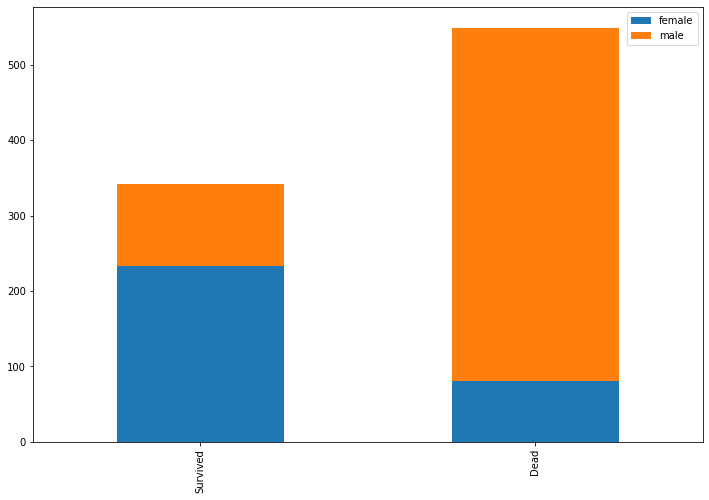

In [ ]:
survived_sex = df[df['Survived']==1]['Sex'].value_counts()
dead_sex = df[df['Survived']==0]['Sex'].value_counts()
sur_df = pd.DataFrame([survived_sex,dead_sex])
sur_df.index = ['Survived','Dead']
sur_df.plot(kind='bar',stacked=True, figsize=(12,8))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


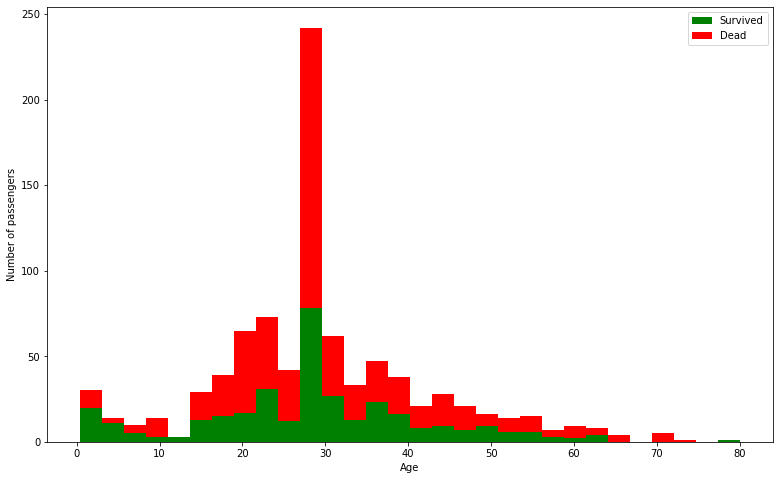

In [ ]:
figure = plt.figure(figsize=(13,8))
plt.hist([df[df['Survived']==1]['Age'],df[df['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

## Create a tf.data ingestion function

In [ ]:
# Convert a Pandas dataframe 
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('Survived')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.repeat().batch(batch_size)
  return ds

In [ ]:
train, test = train_test_split(df, test_size=0.1)
train, val = train_test_split(train, test_size=0.1)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

720 train examples
81 validation examples
90 test examples


In [ ]:
batch_size = 5

train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [ ]:
for feature_batch, label_batch in train_ds.take(1):
  print('All features:', list(feature_batch.keys()))
  print('ages:', feature_batch['Age'])
  print('sex:', feature_batch['Sex'])
  print('labels:', label_batch )

All features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Cabin', 'Embarked']
ages: tf.Tensor([40. 29. 41. 28. 31.], shape=(5,), dtype=float64)
sex: tf.Tensor([b'female' b'male' b'female' b'female' b'female'], shape=(5,), dtype=string)
labels: tf.Tensor([0. 1. 0. 1. 1.], shape=(5,), dtype=float32)


## Functions for testing our columns as we make them

In [ ]:
# Get a batch of data
example_batch = list(train_ds.take(1))[0][0]

In [ ]:
# Call a feature column on a batch of data and show the result- wraps the feature in a feature layer
def demo(feature_column):
  feature_layer = tf.keras.layers.DenseFeatures([feature_column])
  print(feature_layer(example_batch).numpy())


## Categorical and Continuous

## Types of Feature columns

1. Plain Numerical
2. Buckets
3. Embeddings  
4. Hash

### Numerical Columns

These are features that are best represented as floats in the model

A numeric column is the simplest type of column. It is used to represent real valued features. When using this column, your model will receive the column value from the dataframe unchanged.


##### Converting to numerical columns

In [ ]:
# Age
age = fc.numeric_column("Age")
demo(age)

[[22.]
 [24.]
 [ 1.]
 [19.]
 [28.]]


In [ ]:
fare = fc.numeric_column("Fare")
demo(fare)

[[66.6   ]
 [ 8.85  ]
 [46.9   ]
 [26.2833]
 [ 8.05  ]]


### Bucketized columns

##### Converting our numerical ages into buckets

In [ ]:
age_buckets = fc.bucketized_column(age, boundaries=[5, 18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
demo(age_buckets)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Categorical columns

##### Categorical Columns as OHE

In [ ]:
sex = fc.categorical_column_with_vocabulary_list('Sex', ['female', 'male'])

# Indicator Column 
sex_one_hot = fc.indicator_column(sex)

demo(sex_one_hot)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
embarked = fc.categorical_column_with_vocabulary_list('Embarked', ['unknown', 'C','S','Q'])

# Indicator Column 
embarked_one_hot = fc.indicator_column(embarked)


demo(embarked_one_hot)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


### Embedding columns

##### Convert to Embeddings

In [ ]:
embarked_embedding = fc.embedding_column(embarked, dimension=3)
demo(embarked_embedding)

[[-0.26650864  0.5710416  -0.4737021 ]
 [-0.26650864  0.5710416  -0.4737021 ]
 [-0.26650864  0.5710416  -0.4737021 ]
 [-0.26650864  0.5710416  -0.4737021 ]
 [-0.26650864  0.5710416  -0.4737021 ]]


### Hashed feature columns

##### Hashing

In [ ]:
cabin_hash = fc.categorical_column_with_hash_bucket(
      'Cabin', hash_bucket_size=5)
demo(fc.indicator_column(cabin_hash))

[[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


### Crossed feature columns

In [ ]:
crossed_feature = fc.crossed_column([sex, embarked], hash_bucket_size=6)
demo(fc.indicator_column(crossed_feature))

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


## Putting them all together

In [ ]:
# Numeric
age = fc.numeric_column("Age")
fare = fc.numeric_column("Fare")
siblings_spouses = fc.numeric_column("SibSp")

#bucktized OHE
embarked = fc.categorical_column_with_vocabulary_list('Embarked', ['unknown', 'C','S','Q'])
sex = fc.categorical_column_with_vocabulary_list('Sex', ['female', 'male'])
pclass = fc.categorical_column_with_vocabulary_list('Pclass', [1,2,3])
age_buckets = fc.bucketized_column(age, boundaries=[5, 18, 25, 30, 35, 40, 45, 50, 55, 60, 65])

#embeddings
cabin = fc.categorical_column_with_vocabulary_list('Cabin', ['unknown', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'B78',
 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26',
 'C110', 'B58 B60', 'E101', 'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7',
 'C49', 'F4', 'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D', 'C22 C26',
 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124',
 'C91', 'E40', 'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
 'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86', 'C70', 'A16', 'C101',
 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
 'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',
 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30', 'E121', 'D11', 'E77', 'F38', 'B3',
 'D6', 'B82 B84', 'D17', 'A36', 'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24',
 'C50', 'B42', 'C148'])


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
0,0.0,3,male,22.0,1,7.2500,unknown,S
1,1.0,1,female,38.0,1,71.2833,C85,C
2,1.0,3,female,26.0,0,7.9250,unknown,S
3,1.0,1,female,35.0,1,53.1000,C123,S
4,0.0,3,male,35.0,0,8.0500,unknown,S


## Assemble the columns for training

age, cabin, Pclass, fare, sex , sibsp, embarked

In [ ]:
all_columns = [
    age,
    fare,
    siblings_spouses, 
    fc.indicator_column(age_buckets),
    fc.indicator_column(embarked),
    fc.indicator_column(pclass),
    fc.indicator_column(sex),
    fc.embedding_column(cabin, dimension=8),

]

In [ ]:
batch_size = 32
train_ds = df_to_dataset(df, batch_size=batch_size)
val_ds = df_to_dataset(val, batch_size=batch_size)
test_ds = df_to_dataset(test, batch_size=batch_size)

### Create a feature layer


In [ ]:
feature_layer = tf.keras.layers.DenseFeatures(all_columns)

In [ ]:
model = tf.keras.Sequential([
  feature_layer,
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) # 'sigmoid'
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [ ]:
# tf.keras.utils.plot_model(model, 'titanic_model.png', show_shapes=False)

In [ ]:
model.fit(train_ds, 
          steps_per_epoch=len(train)//batch_size,
          validation_data=val_ds, 
          validation_steps=len(val)//batch_size,
          epochs=50)

Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
 1/22 [>.............................] - ETA: 25s - loss: 2.8051 - accuracy: 0.3750WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'Pclass': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=int64>, 'Sex': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=string>, 'Age': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=float64>, 'SibSp': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=int64>, 'Fare': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float64>, 'Cabin': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=string>, 'Embarked': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=string>}
Consider rewriting this model with the Functional API.
22/22 [==============================] - 2s 33ms/step - loss: 1.2517 - accuracy: 0.5442 - val_loss: 0.6478 - val_accuracy: 0.7031
Epoch 2/50

### Evaluate the model

In [ ]:
loss, accuracy = model.evaluate(test_ds, steps=len(test) // batch_size)
print("Accuracy", accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.2973 - accuracy: 0.9062
Accuracy 0.90625
